In [1]:
from collections import defaultdict
import matplotlib.pyplot as plt
from pathlib import Path

* Round 1
  * Total Profit: 20,794.41
    * BANANAS: 8,060.41
    * PEARLS: 12,734.00

* Round 2
  * Total Profit: -305,601.17
    * BANANAS: 4,708.58
    * COCONUTS: -79,221.50
    * PEARLS: 14,072.00
    * PINA_COLADAS: -245,160.25

* Round 3
  * Total Profit: 45,801.66
    * BANANAS: 7,327.72
    * BERRIES: 28,063.94
    * COCONUTS: 0.00
    * DIVING_GEAR: 0.00
    * PEARLS: 10,410.00
    * PINA_COLADAS: 0.00

* Round 4
  * Total Profit: 132,922.58
    * BAGUETTE: 18,667.25
    * BANANAS: 9,308.58
    * BERRIES: 5,625.62
    * COCONUTS: 0.00
    * DIP: -9,588.75
    * DIVING_GEAR: 0.00
    * PEARLS: 10,926.00
    * PICNIC_BASKET: 11,440.00
    * PINA_COLADAS: 76,181.00
    * UKULELE: 10,362.88

* Round 5
  * Total Profit: 85,890.17
    * BAGUETTE: 30,582.88
    * BANANAS: 7,874.11
    * BERRIES: 16,532.62
    * COCONUTS: -15,075.00
    * DIP: 51,601.38
    * DIVING_GEAR: -22,578.00
    * PEARLS: 10,551.00
    * PICNIC_BASKET: 54,638.50
    * PINA_COLADAS: -15,290.00
    * UKULELE: -

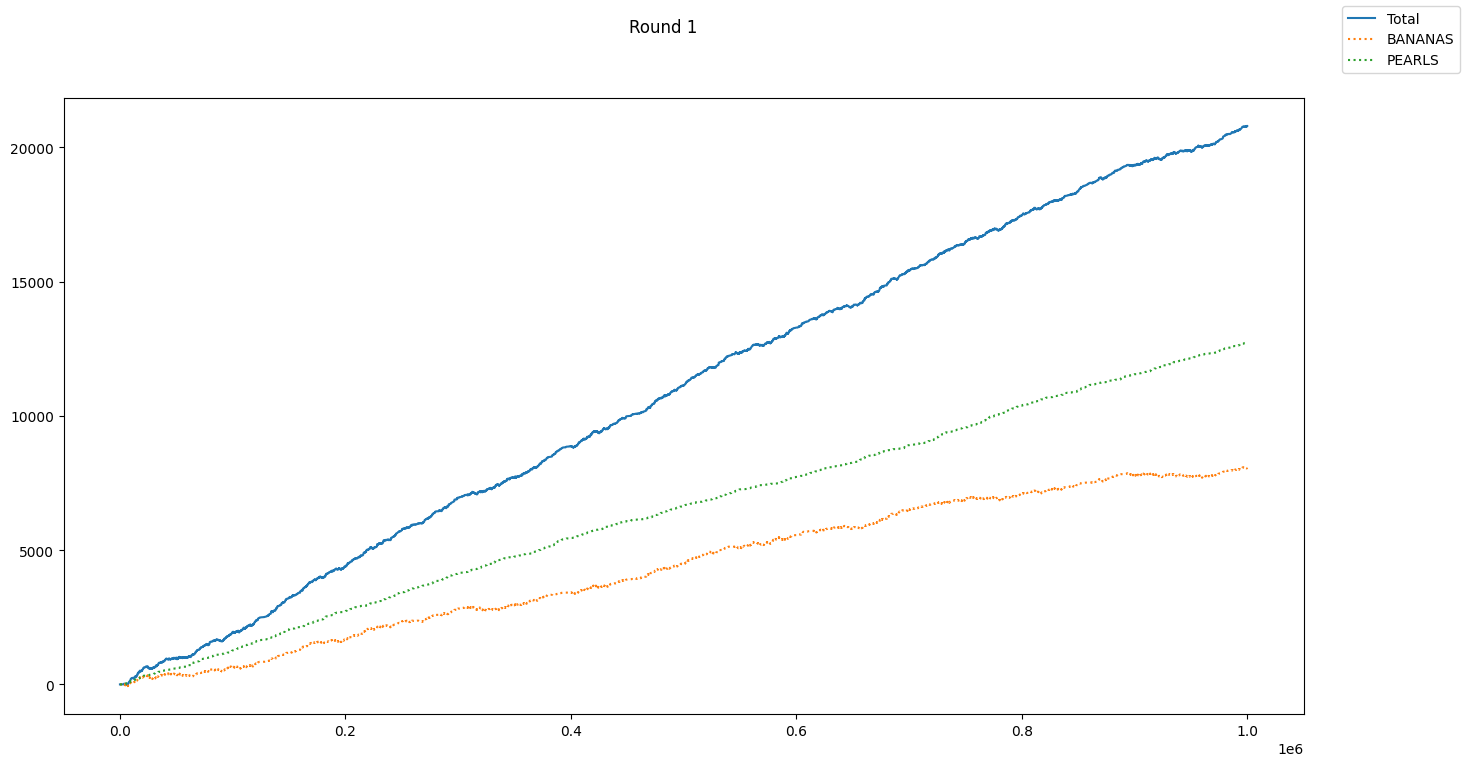

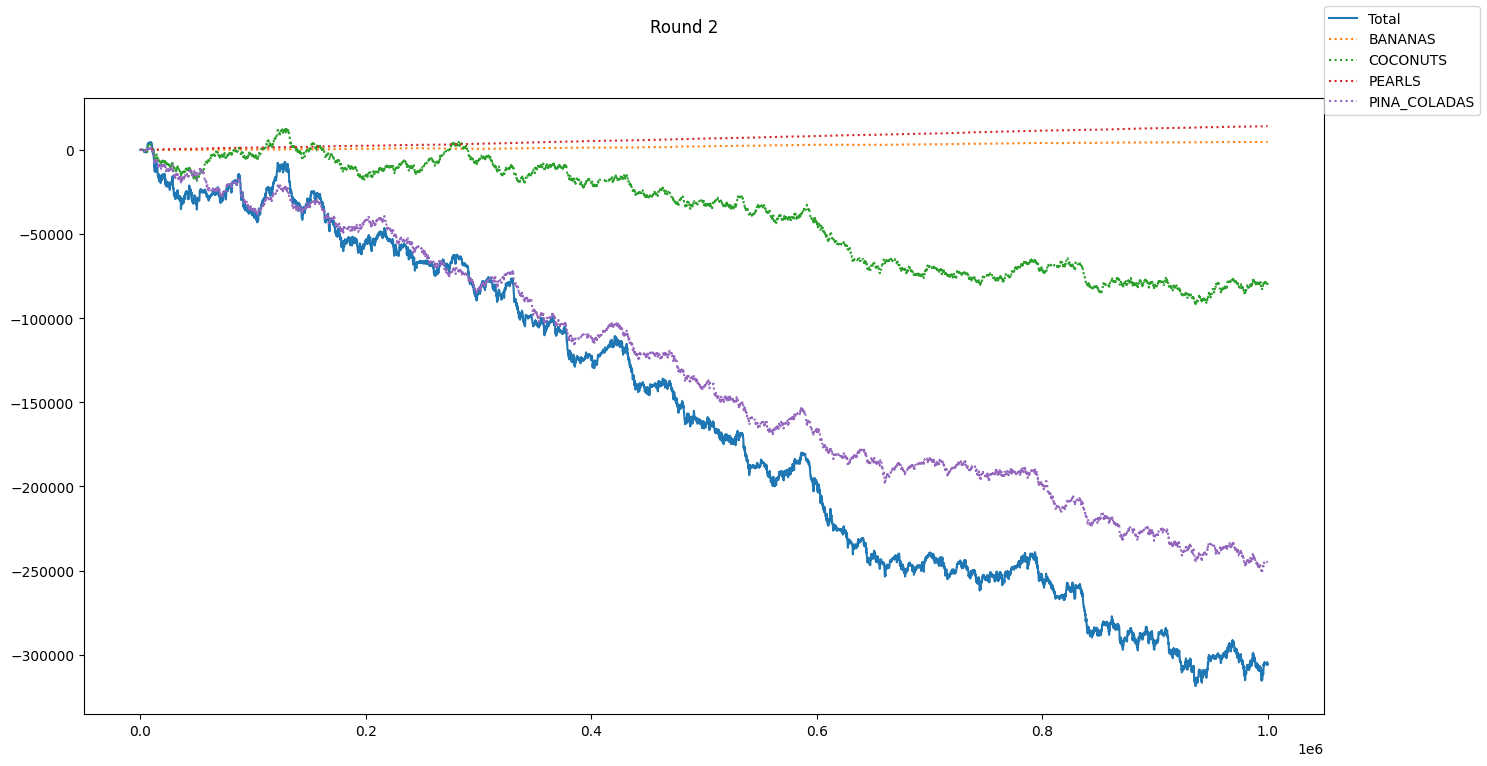

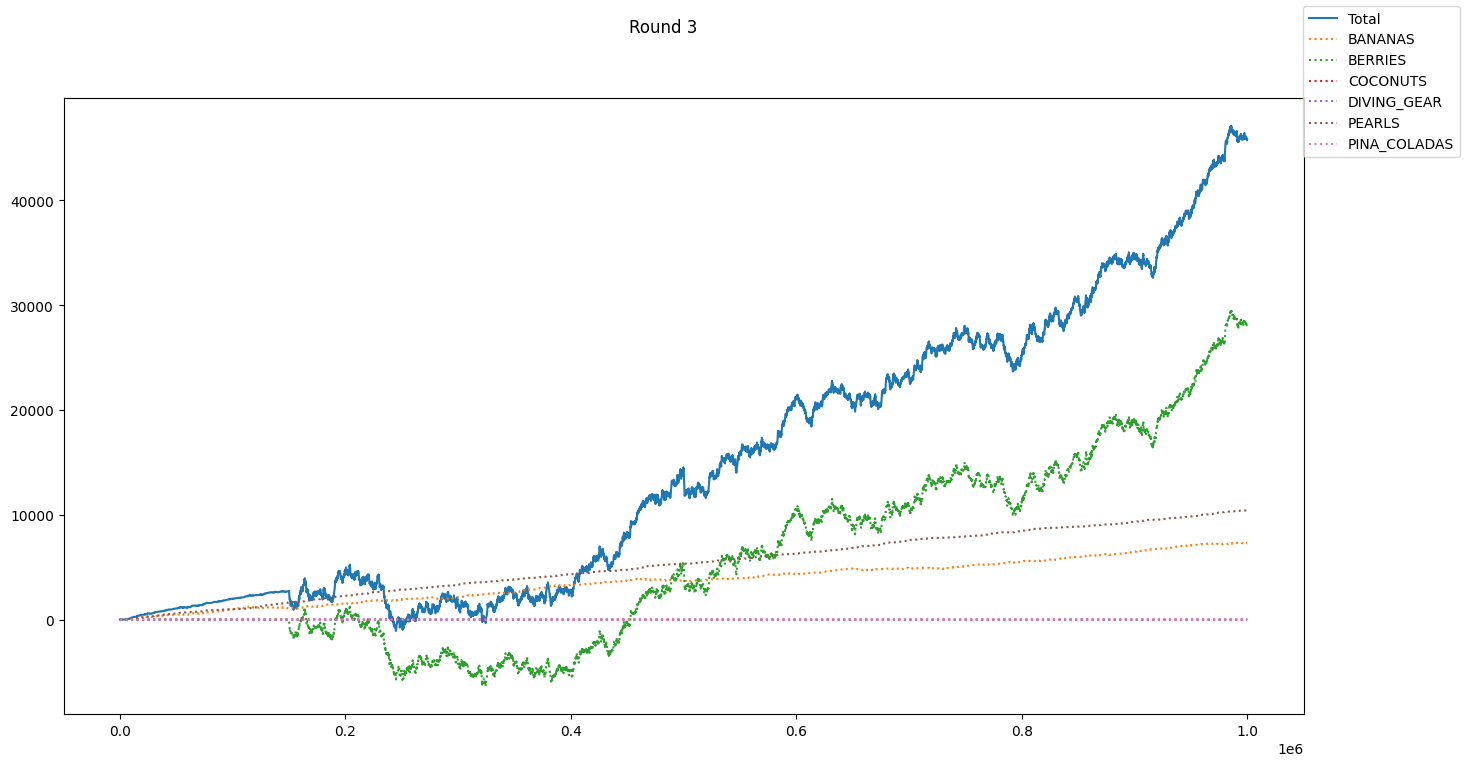

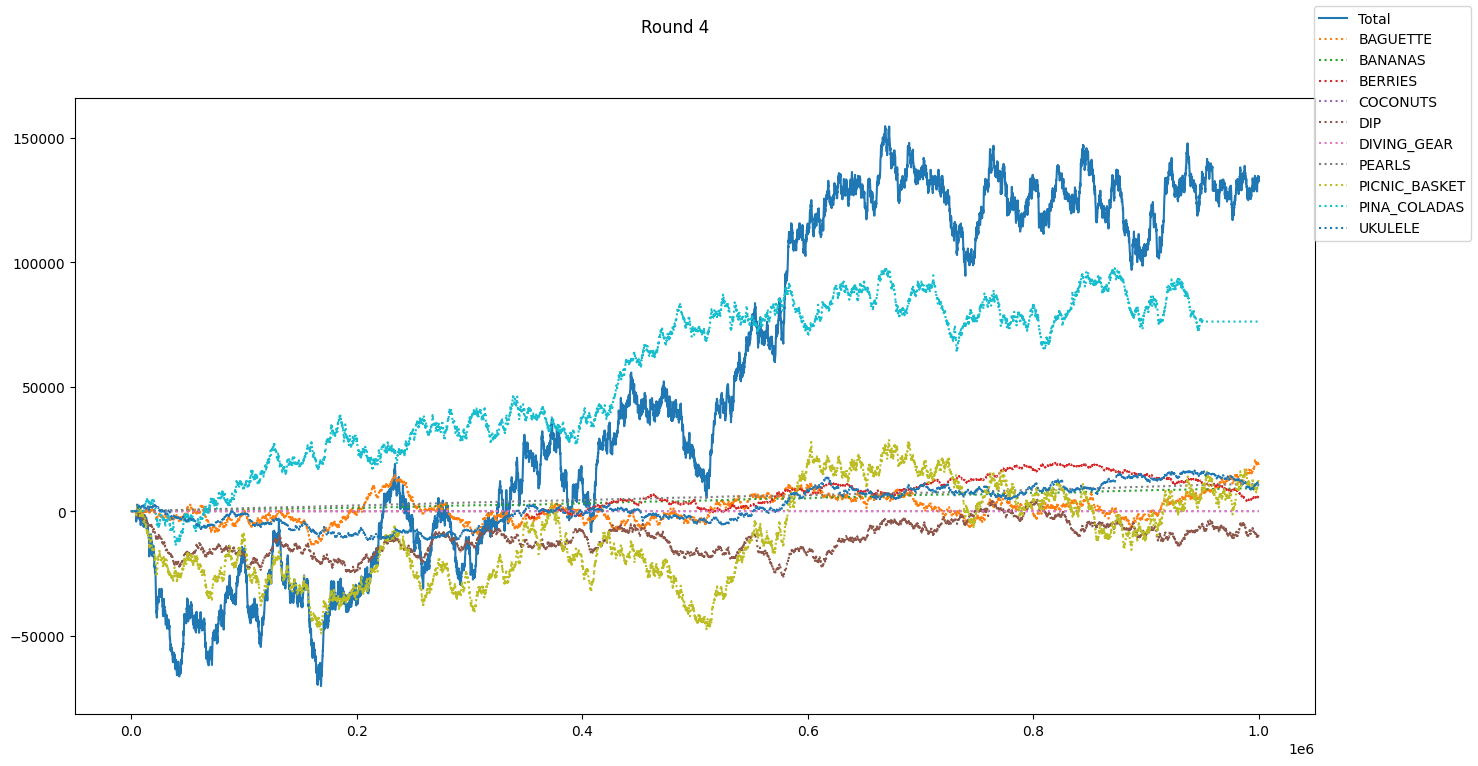

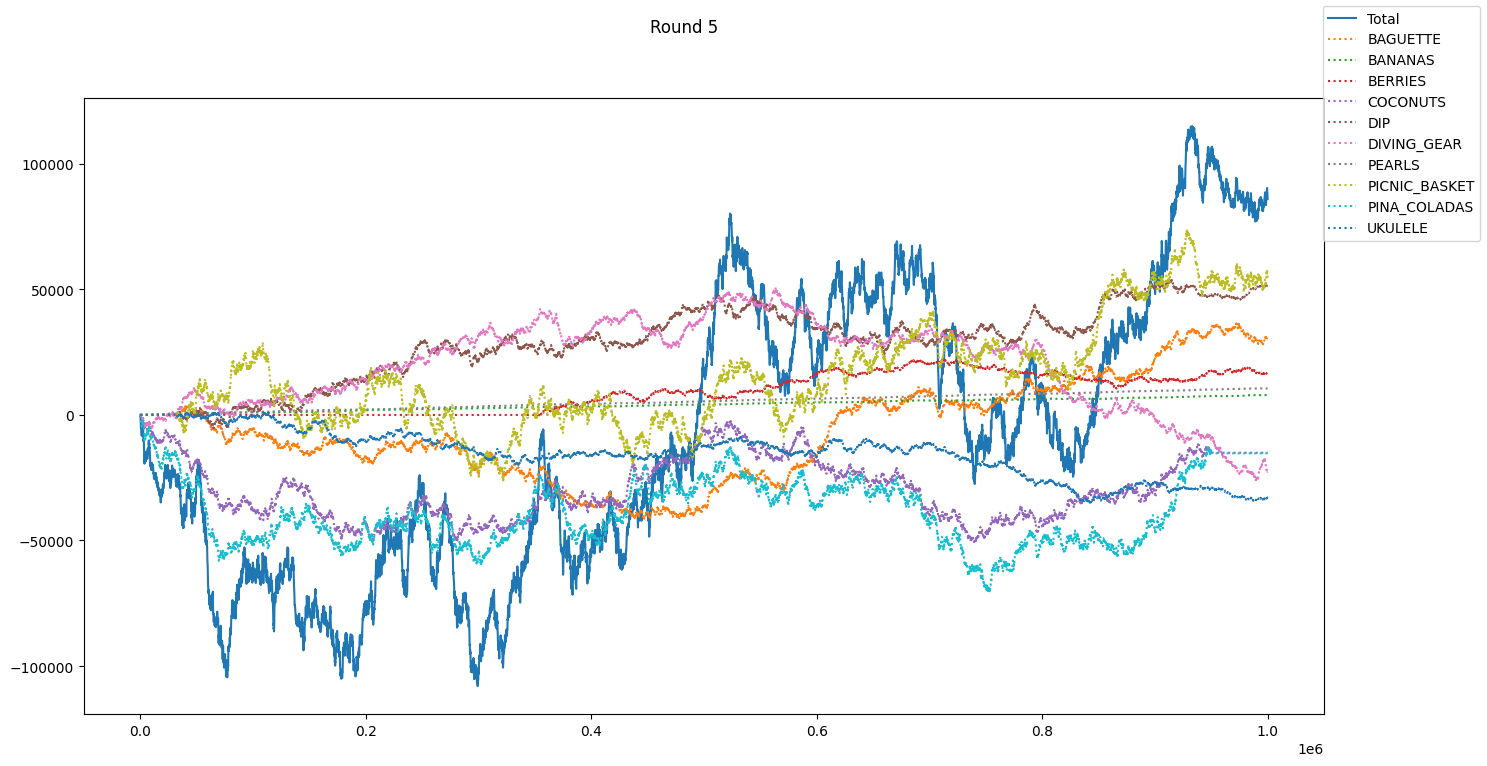

In [2]:
def describe_results(file: Path) -> None:
    rows = [line.split(";") for line in file.read_text(encoding="utf-8").splitlines()[1:]]

    round = int(file.parent.name.replace("round", ""))
    print(f"* Round {round}")

    non_tradable_products = ["DOLPHIN_SIGHTINGS"]

    pnl_by_product = {}
    for row in rows:
        if row[1] == rows[-1][1] and row[2] not in non_tradable_products:
            pnl_by_product[row[2]] = float(row[-1])

    total_pnl = sum(pnl_by_product.values())
    print(f"  * Total Profit: {total_pnl:,.2f}")

    products = sorted(pnl_by_product.keys())
    for product in products:
        print(f"    * {product}: {pnl_by_product[product]:,.2f}")

    xs = set()
    ys = {key: defaultdict(float) for key in ["Total"] + products}

    for row in rows:
        timestamp = int(row[1])
        symbol = row[2]
        pnl = float(row[-1])

        if symbol not in ys:
            continue

        xs.add(timestamp)
        ys[symbol][timestamp] = pnl
        ys["Total"][timestamp] += pnl

    fig = plt.figure(figsize=(16, 8))
    fig.suptitle(f"Round {round}")

    x = sorted(xs)
    for key in ys:
        plt.plot(x, [ys[key][i] for i in x], linestyle="solid" if key == "Total" else "dotted", label=key)

    fig.legend()

files = sorted((Path.cwd().parent.parent / "data").rglob("results.csv"))
for file in files:
    describe_results(file)
    if file != files[-1]:
        print()

In [3]:
investments = {
    "Ice chandeliers": (1, 90_000, 12_960),
    "Crispy cones": (1, 90_000, 12_960),
    "Icicle pillars": (-1, 90_000, 12_960),
    "Fishing rods": (-1, 90_000, 12_960),
    "Thermal underwear": (1, 90_000, 12_960),
    "Lightbox subscriptions": (1, 90_000, 12_960),
    "Iced tea": (-1, 90_000, 12_960),
    "Iced Cotton Candy": (-1, 90_000, 12_960),
    "Penguin tuxedos": (-1, 90_000, 12_960),
}

profit_per_product = {
    "Iced tea": 47476.015625,
    "Iced Cotton Candy": -12877.58203125,
    "Icicle pillars": 14999.3232421875,
    "Lightbox subscriptions": 14201.4833984375,
    "Penguin tuxedos": -5852.53955078125,
    "Crispy cones": -30956.453125,
    "Thermal underwear": -7190.11767578125,
    "Fishing rods": 14841.2490234375,
    "Ice chandeliers": 1653.7509765625
}

base = 100
for product, (direction, investment, fee) in investments.items():
    profit = profit_per_product[product]

    relative = (profit + fee) / investment * direction

    print(f"{product}: {'+' if profit > 0 else ''}{profit:,.0f} ({'+' if relative > 0 else ''}{relative * 100:,.2f}%)")

Ice chandeliers: +1,654 (+16.24%)
Crispy cones: -30,956 (-20.00%)
Icicle pillars: +14,999 (-31.07%)
Fishing rods: +14,841 (-30.89%)
Thermal underwear: -7,190 (+6.41%)
Lightbox subscriptions: +14,201 (+30.18%)
Iced tea: +47,476 (-67.15%)
Iced Cotton Candy: -12,878 (-0.09%)
Penguin tuxedos: -5,853 (-7.90%)
